<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span></li><li><span><a href="#Snippets" data-toc-modified-id="Snippets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Snippets</a></span></li><li><span><a href="#T-SNE" data-toc-modified-id="T-SNE-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>T-SNE</a></span><ul class="toc-item"><li><span><a href="#2D" data-toc-modified-id="2D-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>2D</a></span></li><li><span><a href="#3D" data-toc-modified-id="3D-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>3D</a></span></li></ul></li></ul></div>

# Load Data

In [58]:
#Data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn import model_selection, preprocessing

%matplotlib inline

In [55]:
df = pd.read_csv("data/cleaned_dataframe.csv")

#Get a DF for electricity study and another for the CO2
dfe = df.drop(columns='GHGEmissions(MetricTonsCO2e)')
dfc = df.drop(columns="SiteEnergyUse(kBtu)")

In [9]:
#All features
X = dfe.iloc[:,:-1]
#Use the log function on the electricity, since it has a huge disparity
y = dfe.iloc[:,-1].map(lambda x: np.log(x+1))

#Split the dataset and standardization
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.3, random_state=42)
std_scaler = preprocessing.StandardScaler()
X_train_std = std_scaler.fit_transform(X_train)
X_test_std = std_scaler.transform(X_test)

# Snippets

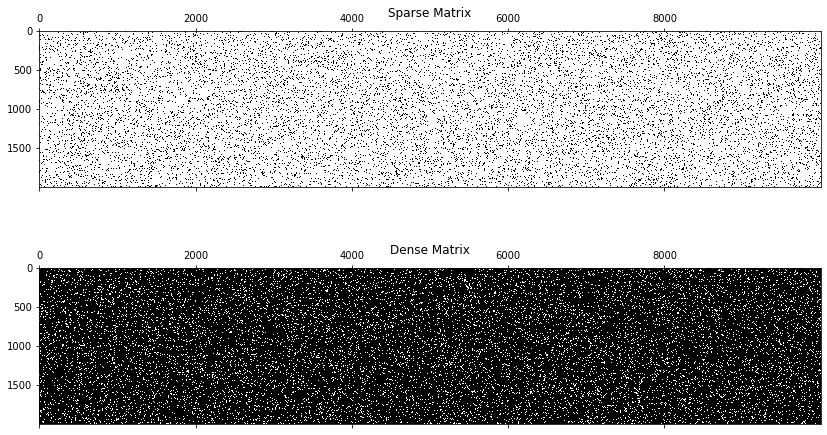

In [10]:
# Génère des données aléatoire
data1 = np.random.binomial(1, 0.1, 20000000).reshape(2000,10000)
data2 = np.random.binomial(1, 0.9, 20000000).reshape(2000,10000)

# Un outils qui permet d'observer la spasité d'une matrice 
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.spy(data1)
plt.title("Sparse Matrix")
plt.subplot(2,1,2)
plt.spy(data2)
plt.title("Dense Matrix");

In [11]:
# Bar de progression
from tqdm import tqdm # version normale
from tqdm.notebook import tqdm # version jupyter notebook
from tqdm.autonotebook import tqdm # version de détection automatique
for i in tqdm(range(10000000)): i

In [12]:
# Ce que fait concrètement zip
a = [1,2,3]
b = [4,5,6]
print(zip(a,b))
list(zip(a,b))

[(1, 4), (2, 5), (3, 6)]

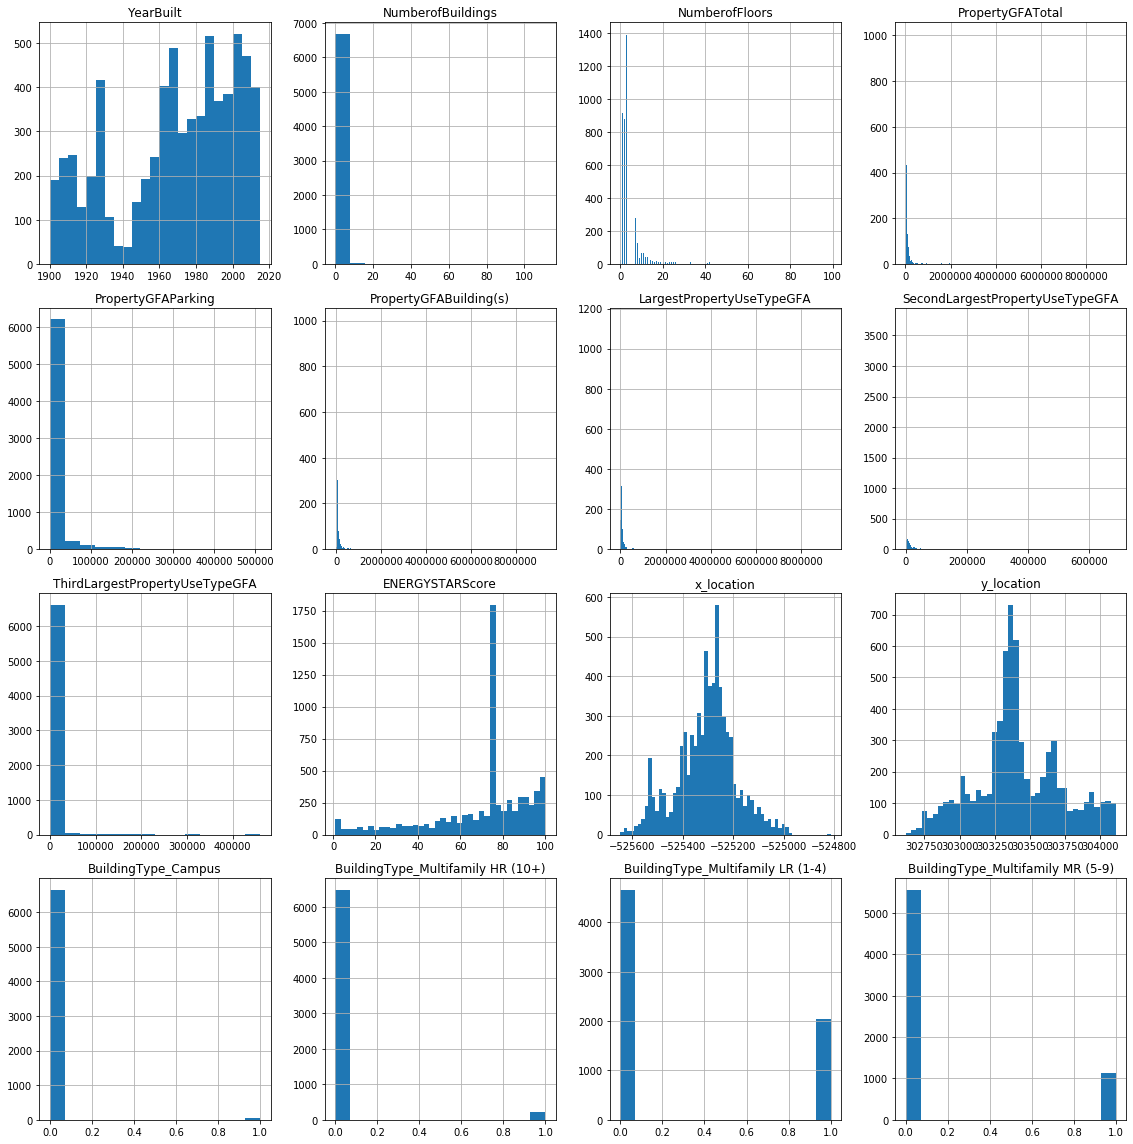

In [13]:
# Plot des historgrammes en plus joli
fig, axes = plt.subplots(4,4)
for colvar, ax in zip(X.iteritems(), axes.ravel()):
    col, var = colvar
    var.hist(bins="auto", figsize=(16,16), ax=ax)
    ax.set_title(col)
plt.tight_layout()

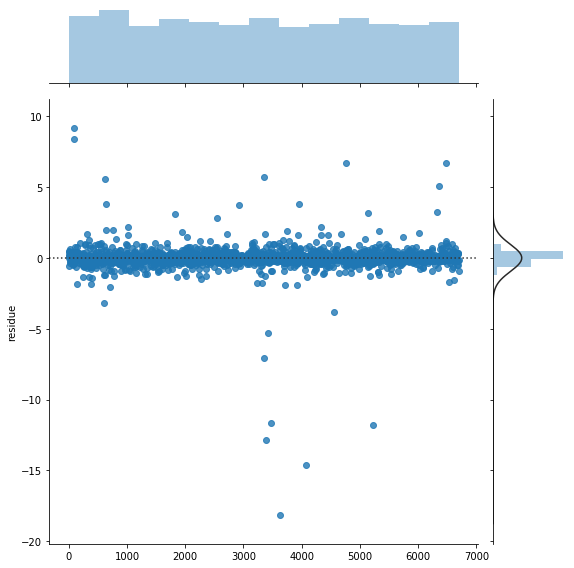

In [14]:
preds = pd.read_pickle("predictions.pkl")
sns.jointplot(preds.index,preds.residue, height=8, kind="resid", )

# T-SNE

## 2D

In [98]:
from sklearn.manifold import TSNE

repr_matrix = [list(x) for x in X_train_std]
tsne = TSNE(n_components=2, verbose=10, init='pca', perplexity=30, n_iter=500, n_iter_without_progress=100)
tsne_results = tsne.fit_transform(repr_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4687 samples in 0.097s...
[t-SNE] Computed neighbors for 4687 samples in 2.583s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4687
[t-SNE] Computed conditional probabilities for sample 2000 / 4687
[t-SNE] Computed conditional probabilities for sample 3000 / 4687
[t-SNE] Computed conditional probabilities for sample 4000 / 4687
[t-SNE] Computed conditional probabilities for sample 4687 / 4687
[t-SNE] Mean sigma: 1.423142
[t-SNE] Computed conditional probabilities in 0.142s
[t-SNE] Iteration 50: error = 68.8786392, gradient norm = 0.0121830 (50 iterations in 1.042s)
[t-SNE] Iteration 100: error = 67.5712357, gradient norm = 0.0069348 (50 iterations in 1.047s)
[t-SNE] Iteration 150: error = 66.7000198, gradient norm = 0.0031895 (50 iterations in 0.989s)
[t-SNE] Iteration 200: error = 66.1749268, gradient norm = 0.0022808 (50 iterations in 1.097s)
[t-SNE] Iteration 250: error = 65.7903214, gradient norm = 0.0016579

In [103]:
df = pd.DataFrame(X_train_std, columns=X_train.columns)

In [104]:
df['tsne1'] = tsne_results[:,0]
df['tsne2'] = tsne_results[:,1]

In [106]:
import plotly.express as px

fig = px.scatter(df.reset_index(), x='tsne1', y='tsne2',
                 color=y_train, labels={'color':'SiteEnergyUse(kBtu)'}, hover_data=['index'])
fig.update_layout(title="T-SNE colored by SiteEnergyUse(kBtu)")
fig.show()

## 3D

In [111]:
from sklearn.manifold import TSNE

repr_matrix = [list(x) for x in X_train_std]
tsne = TSNE(n_components=3, verbose=10, init='pca', perplexity=30, n_iter=500, n_iter_without_progress=100)
tsne_results = tsne.fit_transform(repr_matrix)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4687 samples in 0.094s...
[t-SNE] Computed neighbors for 4687 samples in 2.529s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4687
[t-SNE] Computed conditional probabilities for sample 2000 / 4687
[t-SNE] Computed conditional probabilities for sample 3000 / 4687
[t-SNE] Computed conditional probabilities for sample 4000 / 4687
[t-SNE] Computed conditional probabilities for sample 4687 / 4687
[t-SNE] Mean sigma: 1.423142
[t-SNE] Computed conditional probabilities in 0.140s
[t-SNE] Iteration 50: error = 64.4182739, gradient norm = 0.0059215 (50 iterations in 1.865s)
[t-SNE] Iteration 100: error = 64.1875458, gradient norm = 0.0057719 (50 iterations in 1.720s)
[t-SNE] Iteration 150: error = 64.2641144, gradient norm = 0.0032012 (50 iterations in 2.092s)
[t-SNE] Iteration 200: error = 64.3438797, gradient norm = 0.0067946 (50 iterations in 2.104s)
[t-SNE] Iteration 250: error = 64.3847427, gradient norm = 0.0012802

In [112]:
df = pd.DataFrame(X_train_std, columns=X_train.columns)

In [113]:
df['tsne1'] = tsne_results[:,0]
df['tsne2'] = tsne_results[:,1]
df['tsne3'] = tsne_results[:,2]

In [114]:
import plotly.express as px

fig = px.scatter_3d(df.reset_index(), x='tsne1', y='tsne2', z='tsne3',
                    color=y_train, labels={'color':'SiteEnergyUse(kBtu)'}, hover_data=['index'])
fig.update_layout(title="T-SNE colored by SiteEnergyUse(kBtu)")
fig.show()